# Programming tasks: part 2

Required datasets: `pima.csv`, `breast-cancer-wisconsin.csv`, `bank-full-encoded.csv`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
np.random.seed(123)

## Task 1

Load `pima.csv`

In [3]:
dataframe =pandas.read_csv('pima.csv', header=0)
dataframe.head()

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   blood     768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data = dataframe.values
data[:5, :]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

### a) Split the dataset into training (60%), validation (20%) and test (20%) sets.

In [6]:
data_train, data_test = train_test_split(data, train_size=0.8)
data_train, data_valid = train_test_split(data_train, train_size=0.75)

X_train, y_train = data_train[:,:-1], data_train[:, -1]
X_test, y_test = data_test[:,:-1], data_test[:, -1]
X_valid, y_valid = data_valid[:,:-1], data_valid[:, -1]

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_valid.shape, y_valid.shape)

(460, 8) (460,)
(154, 8) (154,)
(154, 8) (154,)


### b) Fit a decision tree to the training set.

In [8]:
clf = tree.DecisionTreeClassifier(random_state=123)
#clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [9]:
ccp_alphas

array([0.        , 0.00181159, 0.00195652, 0.00195652, 0.00199275,
       0.00201863, 0.00210804, 0.0021167 , 0.00217761, 0.00251745,
       0.0026087 , 0.00289855, 0.00289855, 0.00312922, 0.00320158,
       0.00326087, 0.00341615, 0.00362319, 0.00372671, 0.00380435,
       0.00380435, 0.00386473, 0.00395092, 0.00401338, 0.00419299,
       0.00437371, 0.00459816, 0.00462032, 0.00469118, 0.00491906,
       0.00513921, 0.00659639, 0.00722911, 0.00747654, 0.00815217,
       0.0092968 , 0.00990111, 0.01687234, 0.0329102 , 0.08119252])

### c) For every subtree calculate accuracy on the validation set. Plot accuracy against alpha.

In [10]:
accs = []
for alpha in ccp_alphas:
  clf = tree.DecisionTreeClassifier(random_state = 123, ccp_alpha = alpha)
  clf.fit(X_train, y_train)
  accs.append(clf.score(X_valid, y_valid))

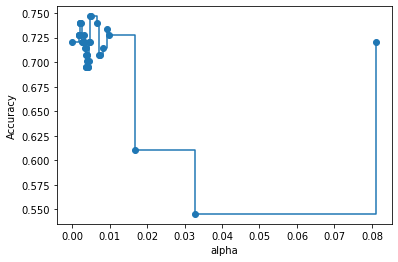

In [11]:
plt.plot(ccp_alphas, accs, marker='o', drawstyle='steps-post')
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.show()

### d) Choose the optimal subtree by picking the aplha with the greatest accuracy. Fit it on joined train and validation sets.

In [12]:
accs = np.array(accs)
alpha_max = max(ccp_alphas[accs==max(accs)])
X = np.concatenate((X_train, X_valid))
y = np.concatenate((y_train, y_valid))
clf = tree.DecisionTreeClassifier(random_state=123, ccp_alpha=alpha_max)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.005139206712433256, random_state=123)

### e) Calcutale accuracy on the test set.

In [13]:
clf.score(X_test, y_test)

0.7727272727272727

## Task 2
Load `breast-cancer-wisconsin.csv`

In [14]:
np.random.seed(123)
dataframe = pandas.read_csv('breast-cancer-wisconsin.csv', na_values = '?', header=0)
dataframe.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [16]:
data = dataframe.values

### a) Split the dataset into training (70%) and test (30%) sets.

In [17]:
X, y = data[:,:-1], data[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

### b) Consider the values of `min_samples_split`=2, 3..., 14. Using 5-fold CV on the training set pick the argument corresponding to the tree with the greatest average accuracy.

In [20]:
from sklearn.model_selection import cross_val_score

[0.9243214811697875, 0.9263622974963182, 0.9325268251630549, 0.9345676414895856, 0.9325268251630549, 0.936608457816116, 0.9366084578161162, 0.9427309067957079, 0.9427309067957079, 0.9427309067957079, 0.9447717231222386, 0.9427309067957081, 0.9427309067957081]


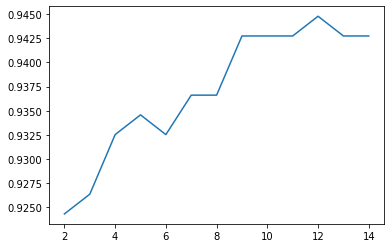

In [21]:
splits = np.arange(2,15)
accuracies = []
for s in splits:
  clf = tree.DecisionTreeClassifier(random_state=123, min_samples_split=s)
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
  accuracies.append(np.mean(scores))
print(accuracies)
plt.plot(range(2,15), accuracies)
plt.show()

In [22]:
splits_optim = int(splits[np.where(accuracies==max(accuracies))])
splits_optim

12

### c) Calculate the accuracy using the test set. Compare it to the full tree, fitted using training data.

In [23]:
clf1 = tree.DecisionTreeClassifier(random_state=123, min_samples_split=splits_optim)
clf1.fit(X_train, y_train)

clf2 = tree.DecisionTreeClassifier(random_state=123)
clf2.fit(X_train, y_train)

print('Accuracy of optimized tree:', clf1.score(X_test, y_test))
print('Accuracy of full tree:', clf2.score(X_test, y_test))

Accuracy of optimized tree: 0.9238095238095239
Accuracy of full tree: 0.9333333333333333


## Task 3

### a) Load `bank-full-encoded.csv`. How many people signed the deposit?

In [24]:
dataframe = pandas.read_csv('bank-full-encoded.csv', header=0)
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [26]:
dataframe['y'].unique()

array([0, 1])

Because the column y takes values of 1 and 0 we can simply sum it to find out how many people signed.

In [27]:
sum(dataframe['y'])

5289

### b) Calculate accuracy for a decision tree using 20-fold CV.

In [30]:
data = dataframe.values
X, y = data[:,:-1], data[:,-1]

clf = tree.DecisionTreeClassifier(random_state=123)
score = cross_val_score(clf, X, y, cv=20, scoring='accuracy')
print(score)
print(np.mean(score))

[0.78681999 0.84166298 0.81203008 0.77355153 0.81335692 0.7717824
 0.70278638 0.79478107 0.76293675 0.65678903 0.74745688 0.84557522
 0.7880531  0.7460177  0.69070796 0.24955752 0.71460177 0.74292035
 0.63584071 0.46637168]
0.7171800010176405
